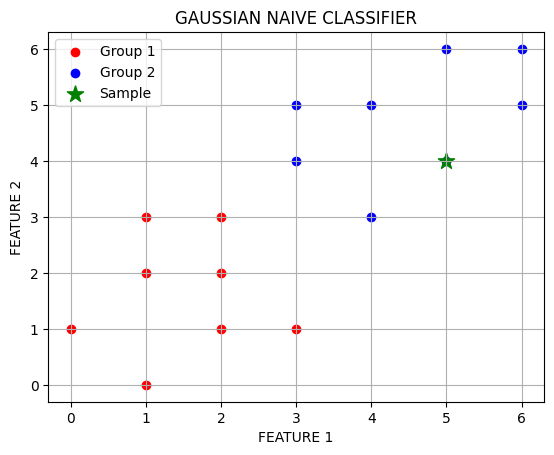

Sample belongs to Group 2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def compute_mean(data):
    dims = data.shape[1]
    mean_vec = np.zeros(dims)
    for i in range(data.shape[0]):
        mean_vec += data[i]
    mean_vec /= data.shape[0]
    return mean_vec

def compute_covariance(mean_vec, data):
    dims = data.shape[1]
    cov_matrix = np.zeros((dims, dims))
    for i in range(data.shape[0]):
        diff = data[i] - mean_vec
        cov_matrix += np.outer(diff, diff)
    cov_matrix /= (data.shape[0] - 1)
    return cov_matrix

def gaussian_probability(mean_vec, cov_matrix, sample, prior_prob):
    dims = len(sample)
    coeff = 1 / (((2 * np.pi) ** (dims / 2)) * (np.linalg.det(cov_matrix) ** 0.5))
    diff = sample - mean_vec
    exponent = np.exp(-0.5 * (diff).T @ np.linalg.inv(cov_matrix) @ (diff))
    return exponent * coeff * prior_prob

group1 = np.array([[0, 1], [1, 0], [1, 2], [2, 1], [2, 2], [3, 1], [1, 3], [2, 3]])
group2 = np.array([[3, 5], [4, 3], [3, 4], [5, 6], [6, 5], [5, 4], [6, 6], [4, 5]])
sample_point = np.array([5, 4])

prior1 = group1.shape[0] / (group1.shape[0] + group2.shape[0])
prior2 = group2.shape[0] / (group1.shape[0] + group2.shape[0])

mean1 = compute_mean(group1)
mean2 = compute_mean(group2)

cov1 = compute_covariance(mean1, group1)
cov2 = compute_covariance(mean2, group2)

prob1 = gaussian_probability(mean1, cov1, sample_point, prior1)
prob2 = gaussian_probability(mean2, cov2, sample_point, prior2)

plt.scatter(group1[:, 0], group1[:, 1], color='red', label='Group 1')
plt.scatter(group2[:, 0], group2[:, 1], color='blue', label='Group 2')
plt.scatter(sample_point[0], sample_point[1], color='green', marker='*', s=150, label='Sample')
plt.xlabel('FEATURE 1')
plt.ylabel('FEATURE 2')
plt.title('GAUSSIAN NAIVE CLASSIFIER')
plt.legend()
plt.grid()
plt.show()

if prob1 > prob2:
    print("Sample belongs to Group 1")
elif prob2 > prob1:
    print("Sample belongs to Group 2")
else:
    print("Prediction is inconclusive")
